In [68]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re

from pandas.tools.plotting import table

In [2]:
# load data
raw_data = pd.read_csv('stack-overflow-developer-survey-2017/survey_results_public.csv')

In [3]:
raw_data_schema = pd.read_csv('stack-overflow-developer-survey-2017/survey_results_schema.csv')

# Data Exploration
Before the business questions are established, the data are explored to provide an overview of the contained information as well as of the data types and value quantities.

In [4]:
# explore data

In [5]:
raw_data.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [6]:
raw_data_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [10]:
# dimensions
raw_data.shape

(51392, 154)

In [11]:
# data types
raw_data.dtypes

Respondent                       int64
Professional                    object
ProgramHobby                    object
Country                         object
University                      object
EmploymentStatus                object
FormalEducation                 object
MajorUndergrad                  object
HomeRemote                      object
CompanySize                     object
CompanyType                     object
YearsProgram                    object
YearsCodedJob                   object
YearsCodedJobPast               object
DeveloperType                   object
WebDeveloperType                object
MobileDeveloperType             object
NonDeveloperType                object
CareerSatisfaction             float64
JobSatisfaction                float64
ExCoderReturn                   object
ExCoderNotForMe                 object
ExCoderBalance                  object
ExCoder10Years                  object
ExCoderBelonged                 object
ExCoderSkills            

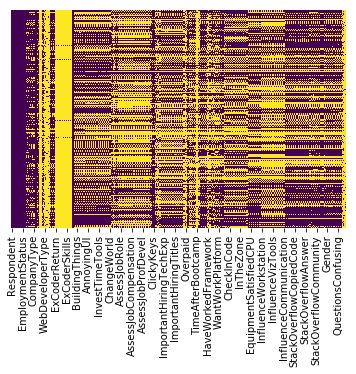

In [12]:
# missing data
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Variable: Professional Developer
raw_data['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [14]:
# Variable: Developer Type
raw_data['DeveloperType'].value_counts()

Web developer                                                                                                                                                                                                                                                                                                                10683
Web developer; Desktop applications developer                                                                                                                                                                                                                                                                                 1849
Mobile developer                                                                                                                                                                                                                                                                                                              1556
Web developer; Mobile developer

In [15]:
# Variable: Developer Type
raw_data['WebDeveloperType'].value_counts()

Full stack Web developer    6816
Back-end Web developer      2610
Front-end Web developer     1270
Name: WebDeveloperType, dtype: int64

In [16]:
# Variable: YearsCodedJob
raw_data['YearsCodedJob'].value_counts()

1 to 2 years        5289
2 to 3 years        4767
3 to 4 years        4003
4 to 5 years        3405
20 or more years    3067
Less than a year    3034
5 to 6 years        2990
9 to 10 years       1956
6 to 7 years        1912
10 to 11 years      1678
7 to 8 years        1638
8 to 9 years        1287
15 to 16 years       845
14 to 15 years       840
11 to 12 years       838
12 to 13 years       741
16 to 17 years       694
17 to 18 years       545
13 to 14 years       531
19 to 20 years       427
18 to 19 years       403
Name: YearsCodedJob, dtype: int64

In [17]:
raw_data['YearsCodedJobPast'].value_counts()

20 or more years    154
1 to 2 years         80
2 to 3 years         78
4 to 5 years         66
3 to 4 years         65
9 to 10 years        59
Less than a year     57
10 to 11 years       50
5 to 6 years         48
7 to 8 years         46
15 to 16 years       42
14 to 15 years       39
6 to 7 years         30
8 to 9 years         28
11 to 12 years       28
19 to 20 years       23
12 to 13 years       20
17 to 18 years       19
16 to 17 years       19
13 to 14 years       17
18 to 19 years        6
Name: YearsCodedJobPast, dtype: int64

In [18]:
# Variable: Carreer Satisfaction

In [19]:
raw_data['CareerSatisfaction'].value_counts()

8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

In [20]:
raw_data['CareerSatisfaction'].describe()

count    42695.000000
mean         7.300574
std          1.955444
min          0.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: CareerSatisfaction, dtype: float64

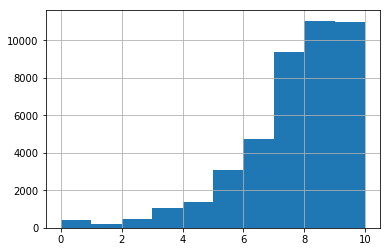

In [21]:
raw_data['CareerSatisfaction'].hist()

In [22]:
# Select Data Sets

In [23]:
# professional developers
professional_data=raw_data[raw_data['Professional']=='Professional developer']
professional_data.shape

(36131, 154)

# Business Questions
In the sections below all analyses according to each business question are carried out.


The analyses follow the following procedure:
- selection of data
- exploration of variables in order to determine how variables have to be prepared
- variable treatment and preparation
- modeling/analysis by descriptive statistics
- evaluating of results


# Section 1: DEVELOPER TYPE

Question: Can differences between developers be found in terms of:

A: Salary

B: Languages/Tools

# Section 1 A: Salary

Step 1 - Data Selection and variable exploration

In [24]:
# extract relevant columns for question 1
data_q1=professional_data[['DeveloperType','YearsCodedJob','Salary','HaveWorkedLanguage','IDE']]
data_q1.shape

(36131, 5)

In [25]:
# Explore Data Types
data_q1.dtypes

DeveloperType          object
YearsCodedJob          object
Salary                float64
HaveWorkedLanguage     object
IDE                    object
dtype: object

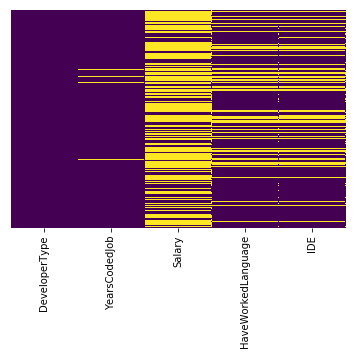

In [26]:
# explore missing data
sns.heatmap(data_q1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
# Question 1 A: Explore relevant variables

In [28]:
data_q1['Salary'].describe()

count     12891.000000
mean      56298.480641
std       39880.905277
min           0.000000
25%       26440.371839
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

In [29]:
data_q1['YearsCodedJob'].value_counts()

1 to 2 years        4277
2 to 3 years        4098
3 to 4 years        3532
4 to 5 years        3026
20 or more years    2796
5 to 6 years        2705
Less than a year    2183
6 to 7 years        1773
9 to 10 years       1745
10 to 11 years      1524
7 to 8 years        1502
8 to 9 years        1207
11 to 12 years       784
15 to 16 years       770
14 to 15 years       752
12 to 13 years       703
16 to 17 years       662
17 to 18 years       515
13 to 14 years       500
19 to 20 years       401
18 to 19 years       372
Name: YearsCodedJob, dtype: int64

Step 2 - Variable preparation

In [30]:
# group variables Years Coded into fewer Categories
def group_var_Years_Coded(var):
    '''
    categorizes an input variable into fewer categories 
    input:  
        var - variable which is summarized into categories
    output: 
        out - variable containing summarized categories
    '''
    if var in [None, '', 'NaN']:
        out=-999
    elif var in ['1 to 2 years']:
        out=1
    elif var in ['2 to 3 years', '3 to 4 years', '4 to 5 years']:
        out=2
    elif var in ['5 to 6 years', '6 to 7 years', '8 to 9 years', '9 to 10 years']:
        out=3
    elif var in ['11 to 12 years', '12 to 13 years', '13 to 14 years', '14 to 15 years'\
                '15 to 16 years', '17 to 18 years', '19 to 20 years', '14 to 15 years']:
        out=4        
    elif var in ['20 or more years']:
        out=5
    else:
        out=-999
    return out

In [31]:
data_q1['Experience_cat']=data_q1['YearsCodedJob'].apply(lambda x: group_var_Years_Coded(x))
#sample['PR'].apply(lambda x: np.nan if x < 90 else x)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
group_var_Years_Coded("NaN")

-999

In [33]:
data_q1.head(5)

,DeveloperType,YearsCodedJob,Salary,HaveWorkedLanguage,IDE,Experience_cat
2,Other,20 or more years,113750.0,Java; PHP; Python,Sublime Text; Vim; IntelliJ,5
4,Mobile developer; Graphics programming; Deskto...,10 to 11 years,NaN,NaN,NaN,-999
7,Web developer,7 to 8 years,NaN,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Vim,-999
8,Web developer; Mobile developer,7 to 8 years,NaN,C#; JavaScript,Vim; Visual Studio; Visual Studio Code,-999
9,Mobile developer; Desktop applications developer,8 to 9 years,NaN,Objective-C; Swift,Coda; Sublime Text; Visual Studio; Xcode,3


In [34]:
data_q1['Experience_cat'].value_counts(sort=True)

 2      10656
 3       7430
-999     7317
 1       4277
 4       3655
 5       2796
Name: Experience_cat, dtype: int64

In [35]:
data_q1[data_q1['Experience_cat']==4].head(10)

,DeveloperType,YearsCodedJob,Salary,HaveWorkedLanguage,IDE,Experience_cat
19,Data scientist; Other,12 to 13 years,NaN,Perl; Python,Emacs,4
41,Web developer; Database administrator; DevOps ...,17 to 18 years,NaN,NaN,NaN,4
73,DevOps specialist; Other,12 to 13 years,NaN,Elixir; Java; JavaScript; SQL,Atom; Notepad++; Vim; Eclipse,4
79,Web developer; Desktop applications developer;...,14 to 15 years,NaN,NaN,NaN,4
81,Web developer,13 to 14 years,110000.000000,Java; SQL,Notepad++; Eclipse,4
89,Web developer,11 to 12 years,113694.267516,JavaScript; Scala,Atom; Emacs; IntelliJ,4
102,Developer with a statistics or mathematics bac...,17 to 18 years,83870.967742,C++; C#,Notepad++; Visual Studio; Visual Studio Code,4
104,Web developer; Desktop applications developer,12 to 13 years,17515.923567,Java; VB.NET; Visual Basic 6,Notepad++; Eclipse; Visual Studio,4
127,Web developer; Embedded applications/devices d...,17 to 18 years,NaN,NaN,NaN,4
129,Machine learning specialist; Data scientist; O...,11 to 12 years,NaN,NaN,NaN,4



Step 3 - Analysis

In [36]:
# Plot Salary mean by category
salary_per_cat=round(data_q1[['Experience_cat','Salary']].groupby(['Experience_cat']).mean().reset_index(),2)
salary_per_cat

,Experience_cat,Salary
0,-999,59131.42
1,1,34152.74
2,2,43938.45
3,3,58376.80
4,4,80448.58
5,5,98128.10


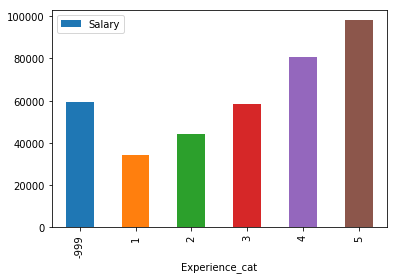

In [37]:
#df.plot(kind='bar',x='name',y='age')
salary_per_cat.plot(kind='bar',x='Experience_cat',y='Salary')

In [38]:
data_q1.head(3)

,DeveloperType,YearsCodedJob,Salary,HaveWorkedLanguage,IDE,Experience_cat
2,Other,20 or more years,113750.0,Java; PHP; Python,Sublime Text; Vim; IntelliJ,5
4,Mobile developer; Graphics programming; Deskto...,10 to 11 years,NaN,NaN,NaN,-999
7,Web developer,7 to 8 years,NaN,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Vim,-999


In [51]:
salary_per_cat2=round(data_q1[['Developer_cat','Experience_cat','Salary']].groupby(['Developer_cat','Experience_cat']).mean().reset_index(),2)
salary_per_cat2

,Developer_cat,Experience_cat,Salary
0,Data_Scientist,-999,60910.00
1,Data_Scientist,1,32826.38
2,Data_Scientist,2,50293.09
3,Data_Scientist,3,64879.60
4,Data_Scientist,4,82441.64
5,Data_Scientist,5,102705.33
6,Desktop_Application,-999,58706.93
7,Desktop_Application,1,35626.58
8,Desktop_Application,2,48067.17
9,Desktop_Application,3,54413.57


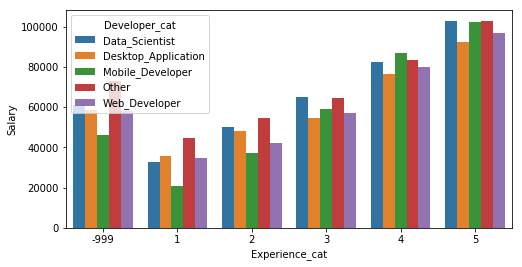

In [61]:
dims = (8, 4)
fig, ax = plt.subplots(figsize=dims)

plot_bar=sns.barplot(ax=ax, x="Experience_cat", y="Salary", hue="Developer_cat", data=salary_per_cat2)


In [62]:
# save plot
fig.savefig("01_salary_ev_per_developer_bar.png")

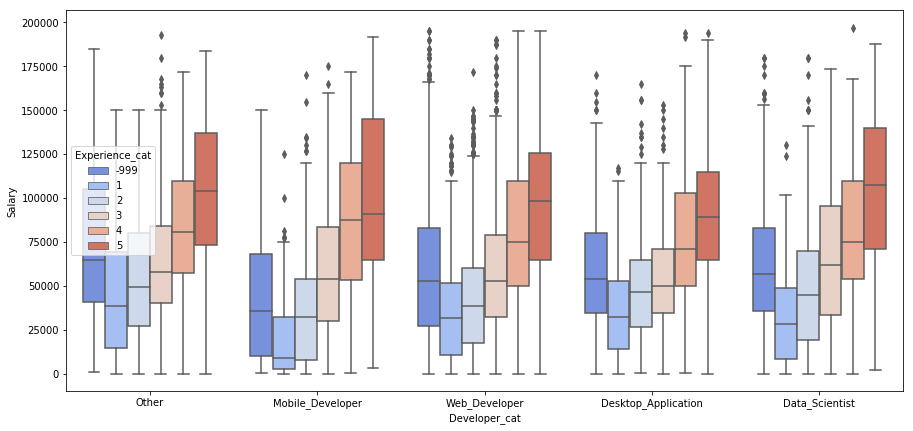

In [65]:
dims = (15, 7)
fig, ax = plt.subplots(figsize=dims)
plot_box=sns.boxplot(ax=ax, x="Developer_cat", y="Salary", hue="Experience_cat", data=data_q1, palette="coolwarm")

In [66]:
# save plot
fig.savefig("02_salary_evolution_per_developer.png")

In [42]:
# Variable Developer Type
#find_result = re.findall(r'AB|AG|AS|Ltd|KB|University', s)

In [43]:
# Group variable into few developer categories
data_q1['DeveloperType'].value_counts()

Web developer                                                                                                                                                                                                                                                              10683
Web developer; Desktop applications developer                                                                                                                                                                                                                               1848
Mobile developer                                                                                                                                                                                                                                                            1556
Web developer; Mobile developer                                                                                                                                                      

In [44]:
"""
str=data_q1['DeveloperType'].iloc[1]
#find_result = re.findall(r'Mobile developer|Graphics', str)
find_result = re.findall(r'Mobile developer|Graphics', data_q1['DeveloperType'].iloc[1])
#find_result = re.findall(r'test', str)
len(find_result)
"""

"\nstr=data_q1['DeveloperType'].iloc[1]\n#find_result = re.findall(r'Mobile developer|Graphics', str)\nfind_result = re.findall(r'Mobile developer|Graphics', data_q1['DeveloperType'].iloc[1])\n#find_result = re.findall(r'test', str)\nlen(find_result)\n"

In [45]:
def group_var_DeveloperType(var):
    #var=str(var)
    '''
    Categorizes an input variable into a distinct output category
    Assumption: A hierarchy is assumed. If at least one of the key words is found, a distinct category is chosen even
    more than one category might apply for a particular observation according to the input data.
    input:  
        var - variable which is summarized into categories
    output: 
        out - variable containing summarized categories
    '''
    if pd.isnull(var):
        out='Other'
    elif len(re.findall(r'Data scientist|Machine learning', var))>0:
        out='Data_Scientist'
    elif len(re.findall(r'Web developer', var))>0:
        out='Web_Developer'
    elif len(re.findall(r'Mobile developer', var))>0:
        out='Mobile_Developer'
    elif len(re.findall(r'Desktop', var))>0:
        out='Desktop_Application'
    else:
        out='Other'
    return out

In [46]:
data_q1['Developer_cat']=data_q1['DeveloperType'].apply(lambda x: group_var_DeveloperType(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
data_q1['Developer_cat'].value_counts(sort=True)

Web_Developer          24007
Data_Scientist          3595
Other                   3364
Desktop_Application     2661
Mobile_Developer        2504
Name: Developer_cat, dtype: int64

In [48]:
data_q1.head()

,DeveloperType,YearsCodedJob,Salary,HaveWorkedLanguage,IDE,Experience_cat,Developer_cat
2,Other,20 or more years,113750.0,Java; PHP; Python,Sublime Text; Vim; IntelliJ,5,Other
4,Mobile developer; Graphics programming; Deskto...,10 to 11 years,NaN,NaN,NaN,-999,Mobile_Developer
7,Web developer,7 to 8 years,NaN,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Vim,-999,Web_Developer
8,Web developer; Mobile developer,7 to 8 years,NaN,C#; JavaScript,Vim; Visual Studio; Visual Studio Code,-999,Web_Developer
9,Mobile developer; Desktop applications developer,8 to 9 years,NaN,Objective-C; Swift,Coda; Sublime Text; Visual Studio; Xcode,3,Mobile_Developer


In [49]:
# Violin plots / box plots - salary developer type

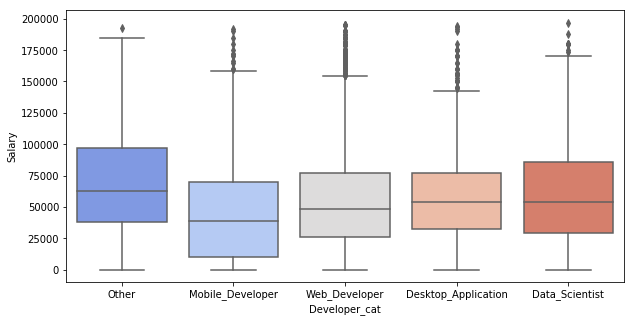

In [63]:
#sns.violinplot(x="Developer_cat", y="Salary", data=data_q1,palette='rainbow')
dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(ax=ax, x="Developer_cat", y="Salary", data=data_q1, palette="coolwarm")

In [64]:
# save plot
fig.savefig("03_salary_dist_per_developer.png")

Step 4 - Results

- Average Salary

Average salaries are very similar for the investigated developer types.

- Salary Development

Salaries are found to clearly increase with progressing experience for all developer types.
Differences between developer types can be found in terms of Minimum/Top salaries as well as expected increase over experience years.


# Section 1 B: Languages/Tools

Step 1 - Data Selection and variable exploration

Step 2 - Variable preparation

In [53]:
# Prepare data - fill missings

In [71]:
data_q1['HaveWorkedLanguage'].fillna(value="missing", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [72]:
# Set flag for each language
data_q1['Python_flag']=data_q1['HaveWorkedLanguage'].apply(lambda x: 1 if len(re.findall(r'Python', x))>0 else 0)
data_q1['Java_flag']=data_q1['HaveWorkedLanguage'].apply(lambda x: 1 if len(re.findall(r'Java', x))>0 else 0)
data_q1['SQL_flag']=data_q1['HaveWorkedLanguage'].apply(lambda x: 1 if len(re.findall(r'SQL', x))>0 else 0)
data_q1['R_flag']=data_q1['HaveWorkedLanguage'].apply(lambda x: 1 if len(re.findall(r'R', x))>0 else 0)
data_q1['Javascript_flag']=data_q1['HaveWorkedLanguage'].apply(lambda x: 1 if len(re.findall(r'JavaScript', x))>0 else 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [73]:
data_q1.describe()

,Salary,Experience_cat,Python_flag,Java_flag,SQL_flag,R_flag,Javascript_flag
count,12891.000000,36131.000000,36131.000000,36131.000000,36131.000000,36131.000000,36131.000000
mean,56298.480641,-200.193850,0.210705,0.606709,0.410617,0.097285,0.509839
std,39880.905277,402.544237,0.407815,0.488487,0.491953,0.296349,0.499910
min,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26440.371839,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50000.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,80000.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,197000.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Step 3 - Analysis

In [74]:
# compute relative usage per developer category

In [75]:
data_q1[data_q1['Developer_cat']=='Data_Scientist']['Python_flag'].sum()/data_q1[data_q1['Developer_cat']=='Data_Scientist'].shape[0]

0.38581363004172464

In [76]:
def generate_cat_dist(Cat='Data_Scientist', indf=data_q1):
    '''
    Computes the value of occurances of predefined technologies relative to all observations for a given developer type
    input:  
        Cat - developer type according to the variable 'Developer_cat'
        indf - input data frame; default value is set to 'data_q1'
    output: 
        result_dict - dictionary containing relative values per technology
    '''
    result_dict={}
    
    result_dict['Python']=round(indf[indf['Developer_cat']==Cat]['Python_flag'].sum()/indf[indf['Developer_cat']==Cat].shape[0],4)
    result_dict['R']=round(indf[indf['Developer_cat']==Cat]['R_flag'].sum()/indf[indf['Developer_cat']==Cat].shape[0],4)
    result_dict['SQL']=round(indf[indf['Developer_cat']==Cat]['SQL_flag'].sum()/indf[indf['Developer_cat']==Cat].shape[0],4)
    result_dict['Java']=round(indf[indf['Developer_cat']==Cat]['Java_flag'].sum()/indf[indf['Developer_cat']==Cat].shape[0],4)
    result_dict['Javascript']=round(indf[indf['Developer_cat']==Cat]['Javascript_flag'].sum()/indf[indf['Developer_cat']==Cat].shape[0],4)
    
    return result_dict

In [77]:
ds_dict=generate_cat_dist(Cat='Data_Scientist')
ds_dict

{'Python': 0.3858,
 'R': 0.1833,
 'SQL': 0.4462,
 'Java': 0.5547,
 'Javascript': 0.4495}

In [78]:
wd_dict=generate_cat_dist(Cat='Web_Developer')

In [79]:
pd.DataFrame(ds_dict,index=['Data_Scientist'])

,Python,R,SQL,Java,Javascript
Data_Scientist,0.3858,0.1833,0.4462,0.5547,0.4495


In [80]:
result = pd.concat([pd.DataFrame(ds_dict,index=['Data_Scientist']),\
                   pd.DataFrame(wd_dict,index=['Web_Developer'])])

In [81]:
result

,Python,R,SQL,Java,Javascript
Data_Scientist,0.3858,0.1833,0.4462,0.5547,0.4495
Web_Developer,0.1788,0.0984,0.4594,0.6881,0.6285


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  


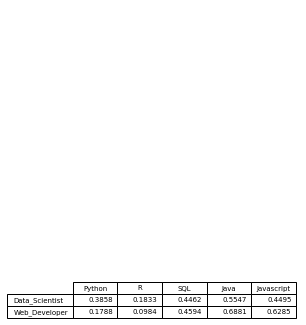

In [93]:
# Export table as image
fig = plt.figure(figsize=(4,5))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, result)  # where df is your data frame

plt.savefig('04_technology.png')

In [83]:
# Export table
result.to_html('04_technology.html')

Step 4 - Results

Developer types differ by used technologies. Most popular: Web Developers: Javascript; Data Scientists: Python

In [65]:
# ########################################################
# ########################################################
# ########################################################

# Section 2:CAREER SATISFICATION
Question: What drives career satisfaction?

In [249]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Step 1 - Data Selection and variable exploration

In [173]:
# extract relevant columns for question 1
data_q3=professional_data[['CareerSatisfaction','DeveloperType','YearsCodedJob','Salary','HoursPerWeek','StackOverflowSatisfaction',\
                           'JobSatisfaction','ProblemSolving','BuildingThings','JobSecurity','FriendsDevelopers']]
data_q3.shape

(36131, 11)

In [174]:
# aggregate categorical variables: add Experience_cat and Developer_cat
data_q3['Experience_cat']=data_q3['YearsCodedJob'].apply(lambda x: group_var_Years_Coded(x))
data_q3['Developer_cat']=data_q3['DeveloperType'].apply(lambda x: group_var_DeveloperType(x))
print(data_q3.shape)
data_q3.head(3)

(36131, 13)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CareerSatisfaction,DeveloperType,YearsCodedJob,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,ProblemSolving,BuildingThings,JobSecurity,FriendsDevelopers,Experience_cat,Developer_cat
2,8.0,Other,20 or more years,113750.0,NaN,8.0,9.0,Strongly agree,Strongly agree,Agree,Somewhat agree,5,Other
4,6.0,Mobile developer; Graphics programming; Deskto...,10 to 11 years,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-999,Mobile_Developer
7,7.0,Web developer,7 to 8 years,NaN,1.0,7.0,7.0,NaN,NaN,NaN,NaN,-999,Web_Developer


In [175]:
# drop base variables
data_q3.drop(['YearsCodedJob','DeveloperType'],axis=1, inplace=True)
print(data_q3.shape)
data_q3.head(3)

(36131, 11)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,CareerSatisfaction,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,ProblemSolving,BuildingThings,JobSecurity,FriendsDevelopers,Experience_cat,Developer_cat
2,8.0,113750.0,NaN,8.0,9.0,Strongly agree,Strongly agree,Agree,Somewhat agree,5,Other
4,6.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-999,Mobile_Developer
7,7.0,NaN,1.0,7.0,7.0,NaN,NaN,NaN,NaN,-999,Web_Developer


In [176]:
# Variable: CareerSatisfaction - explore
data_q3['CareerSatisfaction'].value_counts()

8.0     9541
7.0     8004
9.0     4910
10.0    4726
6.0     3856
5.0     2380
4.0      998
3.0      723
2.0      314
0.0      225
1.0      130
Name: CareerSatisfaction, dtype: int64

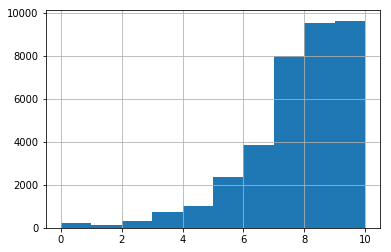

In [177]:
data_q3['CareerSatisfaction'].hist()

In [178]:
# Correlations, Heatmap
# join other variables
# including values
# recode - cutoff 5 - satisfied / not satisfied

# potential variables
# value variables, salary, years of experience, technolgy?, educational background

In [179]:
# Recode Career Statisfaction in a new target variable
# --> two classes: set cut-off at 5 - 0...satisfied, 1...not satisfied (<5): 
data_q3['y_CareerSatisfaction']=data_q3['CareerSatisfaction'].apply(lambda x: 1 if x <5 else 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


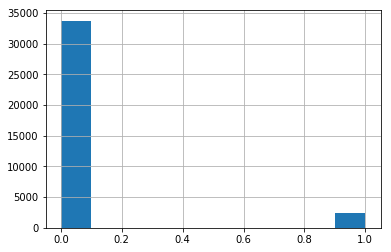

In [180]:
data_q3['y_CareerSatisfaction'].hist()

In [181]:
data_q3['y_CareerSatisfaction'].value_counts()

0    33741
1     2390
Name: y_CareerSatisfaction, dtype: int64

In [182]:
# explore variables
professional_data['ProblemSolving'].value_counts()

Strongly agree       13534
Agree                 7926
Somewhat agree        1148
Disagree                99
Strongly disagree       44
Name: ProblemSolving, dtype: int64

In [183]:
professional_data['BuildingThings'].value_counts()

Strongly agree       12821
Agree                 8294
Somewhat agree        1393
Disagree               175
Strongly disagree       38
Name: BuildingThings, dtype: int64

In [184]:
professional_data['JobSecurity'].value_counts()

Agree                9515
Somewhat agree       5717
Strongly agree       5247
Disagree             1839
Strongly disagree     430
Name: JobSecurity, dtype: int64

In [185]:
professional_data['FriendsDevelopers'].value_counts()

Disagree             7007
Somewhat agree       5864
Agree                5585
Strongly disagree    2130
Strongly agree       2044
Name: FriendsDevelopers, dtype: int64

Step 3 - Analysis

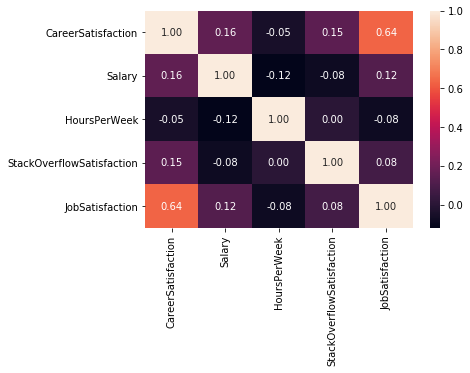

In [186]:
# check correlations of numeric variables
corr=sns.heatmap(data_q3[['CareerSatisfaction','Salary','HoursPerWeek','StackOverflowSatisfaction',\
                           'JobSatisfaction']].corr(), annot=True, fmt='.2f')

In [187]:
# save plot
figure = corr.get_figure()    
figure.savefig('05_career_factors_corr.png', dpi=400, bbox_inches='tight')

#corr.savefig("05_career_factors_corr.png")

#dims = (10, 5)
#fig, ax = plt.subplots(figsize=dims)
#sns.boxplot(ax=ax, x="Developer_cat", y="Salary", data=data_q1, palette="coolwarm")

In [170]:
"""
sns.pairplot(data_q3[['CareerSatisfaction','Salary','HoursPerWeek','StackOverflowSatisfaction',\
                           'JobSatisfaction']].head(100))
"""

"\nsns.pairplot(data_q3[['CareerSatisfaction','Salary','HoursPerWeek','StackOverflowSatisfaction',                           'JobSatisfaction']].head(100))\n"

In [115]:
# variables from above

Step 2 - Variable preparation

In [189]:
# add vars - one hot encoding
#features_final = pd.get_dummies(features_log_minmax_transform)
#features_one_hot = pd.get_dummies(data_q3[['Experience_cat','Developer_cat','ProblemSolving','BuildingThings','JobSecurity','FriendsDevelopers']])
features_one_hot = pd.get_dummies(data_q3[['Developer_cat','ProblemSolving','BuildingThings','JobSecurity','FriendsDevelopers']])
print(features_one_hot.shape)
features_one_hot.head(10)

(36131, 25)


,Developer_cat_Data_Scientist,Developer_cat_Desktop_Application,Developer_cat_Mobile_Developer,Developer_cat_Other,Developer_cat_Web_Developer,ProblemSolving_Agree,ProblemSolving_Disagree,ProblemSolving_Somewhat agree,ProblemSolving_Strongly agree,ProblemSolving_Strongly disagree,...,JobSecurity_Agree,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
15,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
16,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [190]:
# add one hot encoded features to data
data_q3=pd.concat([data_q3, features_one_hot], axis=1, sort=False)
data_q3.shape

(36131, 37)

In [191]:
data_q3.head()

,CareerSatisfaction,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,ProblemSolving,BuildingThings,JobSecurity,FriendsDevelopers,Experience_cat,...,JobSecurity_Agree,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree
2,8.0,113750.0,NaN,8.0,9.0,Strongly agree,Strongly agree,Agree,Somewhat agree,5,...,1,0,0,0,0,0,0,1,0,0
4,6.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-999,...,0,0,0,0,0,0,0,0,0,0
7,7.0,NaN,1.0,7.0,7.0,NaN,NaN,NaN,NaN,-999,...,0,0,0,0,0,0,0,0,0,0
8,6.0,NaN,2.0,8.0,6.0,Strongly agree,Strongly agree,Agree,Somewhat agree,-999,...,1,0,0,0,0,0,0,1,0,0
9,6.0,NaN,1.0,9.0,8.0,NaN,NaN,NaN,NaN,3,...,0,0,0,0,0,0,0,0,0,0


In [192]:
data_q3.head(3)

,CareerSatisfaction,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,ProblemSolving,BuildingThings,JobSecurity,FriendsDevelopers,Experience_cat,...,JobSecurity_Agree,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree
2,8.0,113750.0,NaN,8.0,9.0,Strongly agree,Strongly agree,Agree,Somewhat agree,5,...,1,0,0,0,0,0,0,1,0,0
4,6.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-999,...,0,0,0,0,0,0,0,0,0,0
7,7.0,NaN,1.0,7.0,7.0,NaN,NaN,NaN,NaN,-999,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# drop base features
data_q3.drop(['Developer_cat','ProblemSolving','BuildingThings','JobSecurity','FriendsDevelopers'],axis=1, inplace=True)
print(data_q3.shape)

(36131, 32)


In [195]:
data_q3.head(5)

,CareerSatisfaction,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,Experience_cat,y_CareerSatisfaction,Developer_cat_Data_Scientist,Developer_cat_Desktop_Application,Developer_cat_Mobile_Developer,...,JobSecurity_Agree,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree
2,8.0,113750.0,NaN,8.0,9.0,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,6.0,NaN,NaN,NaN,8.0,-999,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,7.0,NaN,1.0,7.0,7.0,-999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6.0,NaN,2.0,8.0,6.0,-999,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9,6.0,NaN,1.0,9.0,8.0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


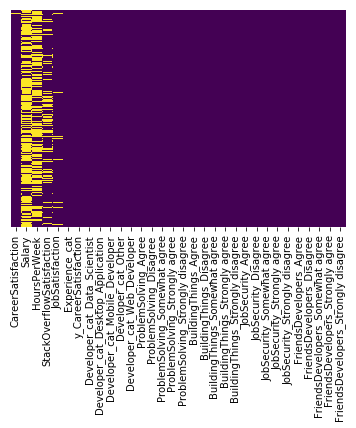

In [196]:
# missings treatment
sns.heatmap(data_q3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [197]:
# missing ratios
sum(data_q3['Salary'].isnull())/data_q3.shape[0]

0.6432149677562204

In [198]:
# impute mean salary by experience category according to analysis above - mean per category
salary_per_cat

,Experience_cat,Salary
0,-999,59131.42
1,1,34152.74
2,2,43938.45
3,3,58376.80
4,4,80448.58
5,5,98128.10


In [199]:
exp_in=-999
salary_per_cat[salary_per_cat['Experience_cat']==exp_in]['Salary']

0    59131.42
Name: Salary, dtype: float64

In [200]:
# imputes the input column with the mean salary per experience category
def impute_salary(incols):
    '''
    Computes the value of occurances of predefined technologies relative to all observations for a given developer type
    input:  
        incols - input columns: column which is to be imputed (experience_cat), \
        column which is used to modify imputation value ("experience_cat")
    output: 
        salary - input column modified by imputations
    '''
    
    salary=incols[0]
    experience_cat=incols[1]
    
    if pd.isnull(salary):
        
        if experience_cat==-999:
            return 59131.42
        elif experience_cat==1:
            return 34152.74
        elif experience_cat==2:
            return 34152.74
        elif experience_cat==3:
            return 58376.80
        elif experience_cat==4:
            return 80448.58
        elif experience_cat==5:
            return 98128.10
    else:
        return salary

In [201]:

#Test
"""
incol=None
exp_in=-999
impute_salary(incol)
"""

'\nincol=None\nexp_in=-999\nimpute_salary(incol)\n'

In [202]:
data_q3.head(3)

,CareerSatisfaction,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,Experience_cat,y_CareerSatisfaction,Developer_cat_Data_Scientist,Developer_cat_Desktop_Application,Developer_cat_Mobile_Developer,...,JobSecurity_Agree,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree
2,8.0,113750.0,NaN,8.0,9.0,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,6.0,NaN,NaN,NaN,8.0,-999,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,7.0,NaN,1.0,7.0,7.0,-999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
data_q3['Salary_new']=data_q3[['Salary', 'Experience_cat']].apply(impute_salary,axis=1)
#apply(impute_geburtsjahr,axis=1)

In [204]:
data_q3.shape

(36131, 33)

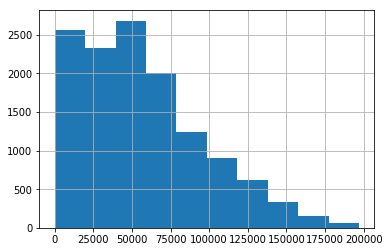

In [205]:
data_q3['Salary'].hist()

In [206]:
data_q3[['Salary','Salary_new']].head(10)

,Salary,Salary_new
2,113750.0,113750.00
4,NaN,59131.42
7,NaN,59131.42
8,NaN,59131.42
9,NaN,58376.80
11,NaN,58376.80
13,NaN,59131.42
14,100000.0,100000.00
15,NaN,34152.74
16,NaN,58376.80


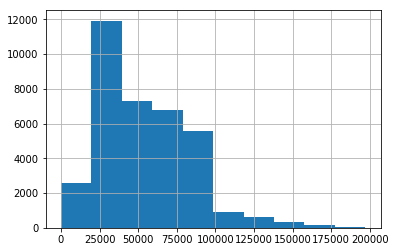

In [207]:
data_q3['Salary_new'].hist()

In [208]:
sum(data_q3['Salary_new'].isnull())/data_q3.shape[0]

0.0

In [209]:
# Fill all missing categorical variables with mode

In [210]:
sum(data_q3['HoursPerWeek'].isnull())/data_q3.shape[0]

0.5921507846447649

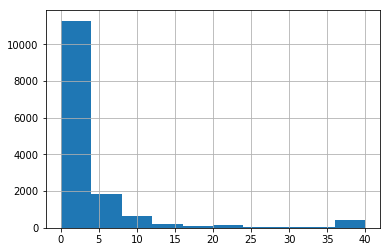

In [211]:
data_q3['HoursPerWeek'].hist()

In [212]:
hours_per_week_imp=float(data_q3['HoursPerWeek'].mode())

In [213]:
data_q3['HoursPerWeek']=data_q3['HoursPerWeek'].fillna(value=hours_per_week_imp)

In [214]:
sum(data_q3['HoursPerWeek'].isnull())/data_q3.shape[0]

0.0

In [215]:
sum(data_q3['StackOverflowSatisfaction'].isnull())/data_q3.shape[0]

0.24555091195925935

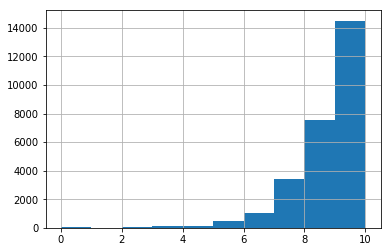

In [216]:
data_q3['StackOverflowSatisfaction'].hist()

In [217]:
data_q3['StackOverflowSatisfaction'].value_counts()

8.0     7534
9.0     7488
10.0    7007
7.0     3408
6.0     1011
5.0      481
4.0      130
3.0      112
2.0       46
0.0       23
1.0       19
Name: StackOverflowSatisfaction, dtype: int64

In [218]:
stack_sat_imp=float(data_q3['StackOverflowSatisfaction'].mode())
stack_sat_imp

8.0

In [219]:
data_q3['StackOverflowSatisfaction']=data_q3['StackOverflowSatisfaction'].fillna(value=stack_sat_imp)

In [220]:
sum(data_q3['StackOverflowSatisfaction'].isnull())/data_q3.shape[0]

0.0

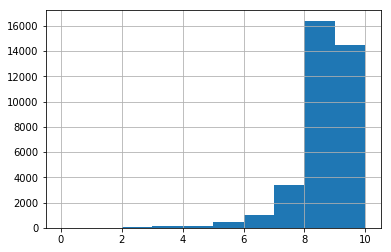

In [221]:
data_q3['StackOverflowSatisfaction'].hist()

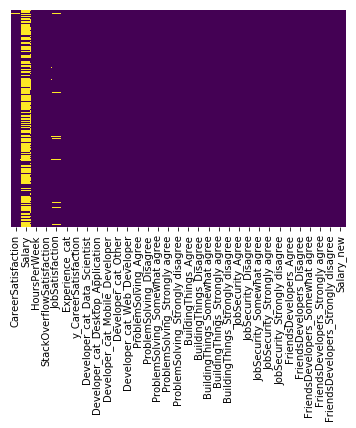

In [222]:
# check all values
sns.heatmap(data_q3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [223]:
data_q3.head(2)

,CareerSatisfaction,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,Experience_cat,y_CareerSatisfaction,Developer_cat_Data_Scientist,Developer_cat_Desktop_Application,Developer_cat_Mobile_Developer,...,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree,Salary_new
2,8.0,113750.0,1.0,8.0,9.0,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,113750.00
4,6.0,NaN,1.0,8.0,8.0,-999,0,0,0,1,...,0,0,0,0,0,0,0,0,0,59131.42


In [224]:
#drop all rows where response variable is missing
sum(data_q3['y_CareerSatisfaction'].isnull())

0

In [225]:
colnames=list(data_q3.columns.values)
colnames

['CareerSatisfaction',
 'Salary',
 'HoursPerWeek',
 'StackOverflowSatisfaction',
 'JobSatisfaction',
 'Experience_cat',
 'y_CareerSatisfaction',
 'Developer_cat_Data_Scientist',
 'Developer_cat_Desktop_Application',
 'Developer_cat_Mobile_Developer',
 'Developer_cat_Other',
 'Developer_cat_Web_Developer',
 'ProblemSolving_Agree',
 'ProblemSolving_Disagree',
 'ProblemSolving_Somewhat agree',
 'ProblemSolving_Strongly agree',
 'ProblemSolving_Strongly disagree',
 'BuildingThings_Agree',
 'BuildingThings_Disagree',
 'BuildingThings_Somewhat agree',
 'BuildingThings_Strongly agree',
 'BuildingThings_Strongly disagree',
 'JobSecurity_Agree',
 'JobSecurity_Disagree',
 'JobSecurity_Somewhat agree',
 'JobSecurity_Strongly agree',
 'JobSecurity_Strongly disagree',
 'FriendsDevelopers_Agree',
 'FriendsDevelopers_Disagree',
 'FriendsDevelopers_Somewhat agree',
 'FriendsDevelopers_Strongly agree',
 'FriendsDevelopers_Strongly disagree',
 'Salary_new']

Step 3 - Analysis

In [226]:
# separate in x and y
y=data_q3['y_CareerSatisfaction']
X=data_q3.drop(['CareerSatisfaction','Salary','y_CareerSatisfaction','JobSatisfaction'],axis=1)

In [227]:
# split in training and test data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 40)

In [239]:
data_q3.head()

,CareerSatisfaction,Salary,HoursPerWeek,StackOverflowSatisfaction,JobSatisfaction,Experience_cat,y_CareerSatisfaction,Developer_cat_Data_Scientist,Developer_cat_Desktop_Application,Developer_cat_Mobile_Developer,...,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree,Salary_new
2,8.0,113750.0,1.0,8.0,9.0,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,113750.00
4,6.0,NaN,1.0,8.0,8.0,-999,0,0,0,1,...,0,0,0,0,0,0,0,0,0,59131.42
7,7.0,NaN,1.0,7.0,7.0,-999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59131.42
8,6.0,NaN,2.0,8.0,6.0,-999,0,0,0,0,...,0,0,0,0,0,0,1,0,0,59131.42
9,6.0,NaN,1.0,9.0,8.0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,58376.80


In [229]:
#determine feature importance via random forest
model = RandomForestClassifier(random_state=999)
model.fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [230]:
X_train.dtypes

HoursPerWeek                           float64
StackOverflowSatisfaction              float64
Experience_cat                           int64
Developer_cat_Data_Scientist             uint8
Developer_cat_Desktop_Application        uint8
Developer_cat_Mobile_Developer           uint8
Developer_cat_Other                      uint8
Developer_cat_Web_Developer              uint8
ProblemSolving_Agree                     uint8
ProblemSolving_Disagree                  uint8
ProblemSolving_Somewhat agree            uint8
ProblemSolving_Strongly agree            uint8
ProblemSolving_Strongly disagree         uint8
BuildingThings_Agree                     uint8
BuildingThings_Disagree                  uint8
BuildingThings_Somewhat agree            uint8
BuildingThings_Strongly agree            uint8
BuildingThings_Strongly disagree         uint8
JobSecurity_Agree                        uint8
JobSecurity_Disagree                     uint8
JobSecurity_Somewhat agree               uint8
JobSecurity_S

In [231]:
# save names of features
keys=list(X_train.columns.values)

In [232]:
# save importances
values=[]
values=[round(x,4) for x in importances]

In [233]:
importance_dict = dict(zip(keys, values ))

In [234]:
for key, value in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

Salary_new: 0.2597
HoursPerWeek: 0.1503
StackOverflowSatisfaction: 0.1276
Experience_cat: 0.0925
JobSecurity_Agree: 0.0262
FriendsDevelopers_Agree: 0.023
JobSecurity_Somewhat agree: 0.0226
FriendsDevelopers_Disagree: 0.0209
FriendsDevelopers_Somewhat agree: 0.0208
Developer_cat_Web_Developer: 0.0205
JobSecurity_Strongly agree: 0.0205
ProblemSolving_Strongly agree: 0.0182
Developer_cat_Data_Scientist: 0.018
ProblemSolving_Agree: 0.0178
BuildingThings_Agree: 0.0166
FriendsDevelopers_Strongly agree: 0.0163
Developer_cat_Other: 0.0155
BuildingThings_Strongly agree: 0.0152
FriendsDevelopers_Strongly disagree: 0.015
Developer_cat_Desktop_Application: 0.0138
Developer_cat_Mobile_Developer: 0.0129
JobSecurity_Disagree: 0.0129
BuildingThings_Somewhat agree: 0.0119
ProblemSolving_Somewhat agree: 0.0103
BuildingThings_Disagree: 0.0066
JobSecurity_Strongly disagree: 0.0061
ProblemSolving_Disagree: 0.0044
ProblemSolving_Strongly disagree: 0.002
BuildingThings_Strongly disagree: 0.0019


In [243]:
# from term 1: supervised learning
def feature_plot(importances, X_train, y_train):
    '''
    Computes the value of occurances of predefined technologies relative to all observations for a given developer type
    input:  
        importances - feature importances as computed by Random Forest method
        X_train - data frame containing independent variables (training data)
        y_train - data frame containing dependent variable (training data)
    output: 
        no return value; function output is a plot
    '''
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  



In [244]:
X_train.head()

,HoursPerWeek,StackOverflowSatisfaction,Experience_cat,Developer_cat_Data_Scientist,Developer_cat_Desktop_Application,Developer_cat_Mobile_Developer,Developer_cat_Other,Developer_cat_Web_Developer,ProblemSolving_Agree,ProblemSolving_Disagree,...,JobSecurity_Disagree,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,FriendsDevelopers_Agree,FriendsDevelopers_Disagree,FriendsDevelopers_Somewhat agree,FriendsDevelopers_Strongly agree,FriendsDevelopers_Strongly disagree,Salary_new
18012,1.0,10.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,34152.740000
38271,1.0,8.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,34152.740000
44231,1.0,8.0,4,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,49242.424242
36135,1.0,9.0,3,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,59139.784946
33468,1.0,8.0,-999,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,59131.420000


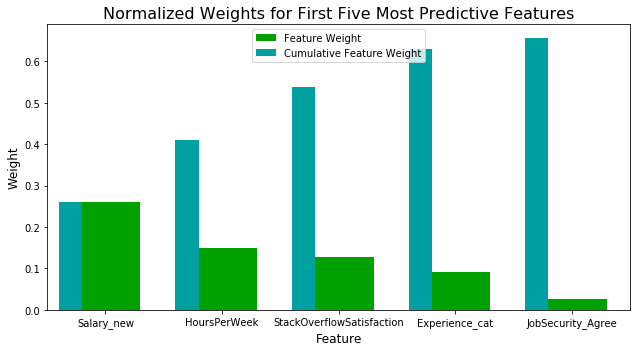

In [245]:
imp_fig=feature_plot(importances=importances, X_train=X_train, y_train=y_train)

In [238]:
# save plot
#figure = imp_fig.get_figure()    
imp_fig.savefig('06_imp_features.png', dpi=400, bbox_inches='tight')

Step 4 - Results

The most important features which can be identified as factors with influence on career satisfaction are:
- Salary
- Working hours
- Stack Overflow Sastisfaction
- Experience
- Job Security